In [2]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import seaborn as sns
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)

C:\Users\vw191\Downloads\annaconda\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
url='https://www.numbeo.com/crime/rankings.jsp?title=2021'

In [4]:
tables=pd.read_html('https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom#cite_note-6')

In [5]:
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

In [6]:
all_tables=soup.find_all("table", id="td")

right_table=soup.find_all("table")
actual_table=soup.find_all("tbody")
actual_table[0]

<tbody>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Caracas, Venezuela</td>
<td style="text-align: right">84.68</td>
<td style="text-align: right">15.32</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Port Moresby, Papua New Guinea</td>
<td style="text-align: right">82.04</td>
<td style="text-align: right">17.96</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Pretoria, South Africa</td>
<td style="text-align: right">81.94</td>
<td style="text-align: right">18.06</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Durban, South Africa</td>
<td style="text-align: right">80.84</td>
<td style="text-align: right">19.16</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Johannesburg, South Africa</td>
<td style="text-align: right">80.65</td>
<td style="text-align: right">19.35</td>
</tr>
<tr style="width: 100%">
<td></

In [7]:
table=soup.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

[]

In [8]:
values=table.findAll('td')

In [9]:
Rank=[]
City=[]
Crime_index=[]
Safety_index=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        Crime_index.append(cells[2].find(text=True))
        Safety_index.append(cells[3].find(text=True))

In [10]:
df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['Crime_index']=Crime_index
df['Safety_index']=Safety_index
df['Rank'] = df.index + 1
df[['City', 'Country']] = df['City'].str.split(',', 1, expand=True)
df = df[['Rank', 'City', 'Country', 'Crime_index', 'Safety_index']]

In [11]:
crime_safety_index = df


In [12]:
#Pushing straight to github repository
crime_safety_index.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\crime_safety_index.csv')

In [13]:
url2 = 'https://www.numbeo.com/health-care/rankings.jsp?title=2021'
tables=pd.read_html('https://www.numbeo.com/health-care/rankings.jsp?title=2021')
page2 = urllib.request.urlopen(url2)
soup2 = BeautifulSoup(page2, "lxml")

all_tables=soup.find_all("table", id="td")

right_table=soup2.find_all("table")
actual_table=soup2.find_all("tbody")
actual_table[0]

table=soup2.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

values=table.findAll('td')

Rank=[]
City=[]
health_care_index=[]
health_care_exp_index=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        health_care_index.append(cells[2].find(text=True))
        health_care_exp_index.append(cells[3].find(text=True))

df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['health_care_index']=health_care_index
df['health_care_exp_index']=health_care_exp_index
df['Rank'] = df.index + 1
df[['City', 'Country']] = df['City'].str.split(',', 1, expand=True)
df = df[['Rank', 'City', 'Country', 'health_care_index', 'health_care_exp_index']]

health_care_index = df
health_care_index

health_care_index.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\health_care_index.csv')

In [14]:
url3 = 'https://www.numbeo.com/pollution/rankings_current.jsp'
tables=pd.read_html('https://www.numbeo.com/pollution/rankings_current.jsp')
page3 = urllib.request.urlopen(url3)
soup3 = BeautifulSoup(page3, "lxml")

all_tables=soup.find_all("table", id="td")

right_table=soup3.find_all("table")
actual_table=soup3.find_all("tbody")
actual_table[0]

table=soup2.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

values=table.findAll('td')

Rank=[]
City=[]
pollution_index=[]
pollution_exp_index=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        pollution_index.append(cells[2].find(text=True))
        pollution_exp_index.append(cells[3].find(text=True))

df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['pollution_index']=pollution_index
df['pollution_exp_index']=pollution_exp_index
df['Rank'] = df.index + 1
df[['City', 'Country']] = df['City'].str.split(',', 1, expand=True)
df = df[['Rank', 'City', 'Country', 'pollution_index', 'pollution_exp_index']]

pollution_index = df
pollution_index

pollution_index.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\pollution_index.csv')

In [15]:
merge_health_crime = pd.merge(health_care_index, crime_safety_index, left_on=['City', 'Country'], right_on=['City', 'Country'], how='outer')
merge_health_crime_pollution = pd.merge(merge_health_crime, pollution_index, left_on=['City', 'Country'], right_on=['City', 'Country'], how='outer')

In [16]:
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NV, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('CO, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NY, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('CA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('WT, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('TX, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('VA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NE, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('Newfoundland and Labrador, Canada','Canada')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('KY, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('FL, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('AB, Canada','Canada')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('BC, Canada','Canada')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('TN, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('AZ, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('AK, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('MI, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('WA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('IL, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NM, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('GA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('PA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('DC, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('UT, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('IN, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('OR, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NC, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('MD, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('MO, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('Shandong, China','China')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace(' ','')

In [ ]:
#https://simplemaps.com/data/world-cities source of population dataset

In [18]:
pop_data = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_3_satisfaction\worldcities_population_data.csv')


In [19]:
merge_health_crime_pollution_pop = pd.merge(merge_health_crime_pollution, pop_data, left_on=['City'], right_on=['city'])
merge_health_crime_pollution_pop['CityCountry'] = merge_health_crime_pollution_pop['City'] + merge_health_crime_pollution_pop['Country'] 
merge_health_crime_pollution_pop['Country']=merge_health_crime_pollution_pop['Country'].str.replace(' ','')


In [20]:

merge_health_crime_pollution_pop.to_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_3_satisfaction\merge_health_crime_pollution_pop.csv')
merge_health_crime_pollution_pop


,Rank_x,City,Country,health_care_index,health_care_exp_index,Rank_y,Crime_index,Safety_index,Rank,pollution_index,pollution_exp_index,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,CityCountry
0,1.0,Taipei,Taiwan,87.33,160.90,429.0,13.45,86.55,216.0,50.11,84.79,Taipei,Taipei,25.0478,121.5319,Taiwan,TW,TWN,Taipei,primary,2684567.0,1158881289,TaipeiTaiwan
1,2.0,Kaohsiung,Taiwan,86.78,159.90,NaN,NaN,NaN,58.0,78.65,143.70,Kaohsiung,Kaohsiung,22.6167,120.3000,Taiwan,TW,TWN,Kaohsiung,admin,2773533.0,1158331334,KaohsiungTaiwan
2,3.0,Gold Coast,Australia,86.04,158.79,218.0,42.72,57.28,316.0,25.33,42.26,Gold Coast,Gold Coast,-28.0167,153.4000,Australia,AU,AUS,Queensland,NaN,679127.0,1036153217,Gold CoastAustralia
3,4.0,Liverpool,UnitedKingdom,85.71,158.51,201.0,44.35,55.65,NaN,NaN,NaN,Liverpool,Liverpool,53.4000,-2.9833,United Kingdom,GB,GBR,Liverpool,NaN,864122.0,1826558678,LiverpoolUnitedKingdom
4,5.0,Chiang Mai,Thailand,84.84,155.70,394.0,23.98,76.02,66.0,77.08,140.24,Chiang Mai,Chiang Mai,18.7889,98.9833,Thailand,TH,THA,Chiang Mai,admin,132634.0,1764662886,Chiang MaiThailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,NaN,Surabaya,Indonesia,NaN,NaN,NaN,NaN,NaN,192.0,55.29,93.82,Surabaya,Surabaya,-7.2458,112.7378,Indonesia,ID,IDN,Jawa Timur,admin,4975000.0,1360484663,SurabayaIndonesia
800,NaN,Shimla,India,NaN,NaN,NaN,NaN,NaN,220.0,48.98,83.58,Shimla,Shimla,31.1033,77.1722,India,IN,IND,Himāchal Pradesh,admin,206575.0,1356962932,ShimlaIndia
801,NaN,Goa,India,NaN,NaN,NaN,NaN,NaN,222.0,48.47,88.09,Goa,Goa,13.7000,123.5000,Philippines,PH,PHL,Camarines Sur,NaN,63308.0,1608724845,GoaIndia
802,NaN,Reno,UnitedStates,NaN,NaN,NaN,NaN,NaN,287.0,32.67,53.24,Reno,Reno,39.5497,-119.8483,United States,US,USA,Nevada,NaN,445020.0,1840020121,RenoUnitedStates


In [22]:
#https://ghsl.jrc.ec.europa.eu/ucdb2018visual.php
#https://ghsl.jrc.ec.europa.eu/index.php


eu_density_data = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\eu_density_data.csv')
eu_density_data

C:\Users\vw191\Downloads\annaconda\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (20,21,22,23,28,31,32,33,34,55,56,57,58,159) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID_HDC_G0,QA2_1V,AREA,BBX_LATMN,BBX_LONMN,BBX_LATMX,BBX_LONMX,GCPNT_LAT,GCPNT_LON,CTR_MN_NM,CTR_MN_ISO,XBRDR,XCTR_NBR,XC_NM_LST,XC_ISO_LST,GRGN_L1,GRGN_L2,UC_NM_MN,UC_NM_LST,UC_NM_SRC,H75_NBR,H90_NBR,H00_NBR,H75_AREA,H90_AREA,H00_AREA,E_BM_NM_LST,E_SL_LST,EL_AV_ALS,E_KG_NM_LST,E_RB_NM_LST,E_WR_P_90,E_WR_P_00,E_WR_P_14,E_WR_T_90,E_WR_T_00,E_WR_T_14,B75,B90,B00,B15,P75,P90,P00,P15,BUCAP75,BUCAP90,BUCAP00,BUCAP15,NTL_AV,GDP90_SM,GDP00_SM,GDP15_SM,INCM_CMI,DEV_CMI,TT2CC,E_GR_AV90,E_GR_AV00,E_GR_AV14,E_GR_AH90,E_GR_AM90,E_GR_AL90,E_GR_AT90,E_GR_AH00,E_GR_AM00,E_GR_AL00,E_GR_AT00,E_GR_AH14,E_GR_AM14,E_GR_AL14,E_GR_AT14,E_EC2E_E75,E_EC2E_E90,E_EC2E_E00,E_EC2E_E15,E_EC2E_R75,E_EC2E_R90,E_EC2E_R00,E_EC2E_R15,E_EC2E_I75,E_EC2E_I90,E_EC2E_I00,E_EC2E_I15,E_EC2E_T75,E_EC2E_T90,E_EC2E_T00,E_EC2E_T15,E_EC2E_A75,E_EC2E_A90,E_EC2E_A00,E_EC2E_A15,E_EC2O_E75,E_EC2O_E90,E_EC2O_E00,E_EC2O_E15,E_EC2O_R75,E_EC2O_R90,E_EC2O_R00,E_EC2O_R15,E_EC2O_I75,E_EC2O_I90,E_EC2O_I00,E_EC2O_I15,E_EC2O_T75,E_EC2O_T90,E_EC2O_T00,E_EC2O_T15,E_EC2O_A75,E_EC2O_A90,E_EC2O_A00,E_EC2O_A15,E_EPM2_E75,E_EPM2_E90,E_EPM2_E00,E_EPM2_E15,E_EPM2_R75,E_EPM2_R90,E_EPM2_R00,E_EPM2_R15,E_EPM2_I75,E_EPM2_I90,E_EPM2_I00,E_EPM2_I15,E_EPM2_T75,E_EPM2_T90,E_EPM2_T00,E_EPM2_T15,E_EPM2_A75,E_EPM2_A90,E_EPM2_A00,E_EPM2_A15,E_CPM2_T00,E_CPM2_T05,E_CPM2_T10,E_CPM2_T14,EX_FD_AREA,EX_FD_B75,EX_FD_B90,EX_FD_B00,EX_FD_B15,EX_FD_P75,EX_FD_P90,EX_FD_P00,EX_FD_P15,EX_SS_AREA,EX_SS_B75,EX_SS_B90,EX_SS_B00,EX_SS_B15,EX_SS_P75,EX_SS_P90,EX_SS_P00,EX_SS_P15,EX_EQ19PGA,EX_EQ19MMI,EX_EQ19_Q,EX_HW_IDX,SDG_LUE9015,SDG_A2G14,SDG_OS15MX,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163
0,1,1,185,21.247683,-158.043016,21.422193,-157.730529,21.340678,-157.893497,United States,USA,0,1,United States,USA,Northern America,Northern America,Honolulu,Honolulu; Waipahu; Pearl City; Aiea,GISCO OSM,1,1,1,115,152,174,Tropical and Subtropical Dry Broadleaf Forests,Vertisols,52.29643514,NAN,NAN,955.5000305,620.9750214,741.6250153,23.4560318,23.153346,23.526622,78.845200,78.845200,80.214867,80.647377,277211.19660,378482.07210,458967.88170,512853.66670,284.422853,208.319509,174.772288,157.252219,24.768574,1.504144e+10,1.584126e+10,2.192668e+10,HIC,MDR,15412.05792,0.231514514,0.349464052,0.369290388,3.310453,129.412130,51.089083,179.678081,56.331924,113.192717,14.287026,183.811667,70.317059,98.455611,15.038997,183.811667,2.867485e+06,1.265081e+06,1.012234e+06,495299.593400,456114.038800,403581.138600,462973.483400,396627.287300,598840.500500,601347.375100,541277.833900,456837.498300,208651.075000,276910.085000,341852.064400,345201.327900,0.013626,0.029494,0.042942,0.056613,NaN,156371.556800,42922.159470,11381.377170,NaN,13811.961730,11022.504910,8225.571851,NaN,29257.399700,67747.537980,51154.996320,NaN,NaN,1029.574596,10692.735960,2.418542,3.153900,2.293634,3.078804,300.287590,134.342385,98.071016,41.850553,88.248068,112.991622,68.033587,40.144556,118.767334,208.712524,224.997453,174.221274,2.925043e+01,43.893797,2.936470e+01,2.353677e+01,0.042916,0.043009,0.041517,0.047534,7.237346,6.158930,5.563796,5.765125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,68.280144,68.280144,69.576241,69.950920,240002.90070,327680.83150,397443.03140,444041.52950,NaN,NaN,missing,NaN,0.074385,0.226415,56.41,NaN,NaN,NaN,NaN
1,2,2,42,-17.641184,-149.628088,-17.517631,-149.508018,-17.534103,-149.568053,French Polynesia,PYF,0,1,French Polynesia,PYF,Oceania,Polynesia,Papeete,Papeete,GISCO OSM,0,1,1,0,29,29,Tropical and Subtropical Moist Broadleaf Forests,NAN,33.69031803,NAN,NAN,1623.150055,1376.275009,1536.075012,21.90713358,22.041168,22.021633,14.051702,14.051702,14.051702,14.493433,47644.96402,71862.23154,83726.09207,91521.12460,294.925221,195.536671,167.829421,158.361614,9.028501,0.000000e+00,0.000000e+00,0.000000e+00,HIC,LDC,NaN,NaN,0.445268369,0.43647732,0.000000,0.000000,0.000000,0.000000,15.656925,19.369919,6.614911,41.478138,16.868909,18.625840,6.147005,41.641755,3.240516e+03,2.106038e+04,1.506982e+04,4916.763772,4983.827260,16692.748950,3205

In [23]:
eu_density_data = eu_density_data[['UC_NM_MN' ,'XC_NM_LST' ,'XCTR_NBR', 'AREA', 'P15']]

In [24]:
eu_density_data.columns = ['City', 'Country', 'boundary_code', 'area_km2', 'population_2015']
eu_density_data = eu_density_data[eu_density_data['boundary_code'] == 1]

eu_density_data['CityCountry'] = eu_density_data['City'] + eu_density_data['Country'] 
eu_density_data['CityCountry']= eu_density_data['CityCountry'].str.replace(' ','')
eu_density_data.to_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_3_satisfaction\eu_density_data.csv')

eu_density_data.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\eu_density_data.csv')

In [25]:
eu_density_data['Country'] = eu_density_data['Country'].astype(str)
eu_density_data['City'] = eu_density_data['City'].astype(str) 

merge_health_crime_pollution_pop['Country'] = merge_health_crime_pollution_pop['Country'].astype(str)
merge_health_crime_pollution_pop['City'] = merge_health_crime_pollution_pop['City'].astype(str) 
eu_density_data

eu_density_data['CityCountry']=eu_density_data['CityCountry'].str.replace(' ','')
eu_density_data['pop_density_15'] = eu_density_data['population_2015'] / eu_density_data['area_km2']
eu_density_data.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\eu_density_data_with_area.csv')
eu_density_data


,City,Country,boundary_code,area_km2,population_2015,CityCountry,pop_density_15
0,Honolulu,United States,1,185,512853.66670,HonoluluUnitedStates,2772.181982
1,Papeete,French Polynesia,1,42,91521.12460,PapeeteFrenchPolynesia,2179.074395
2,Santa Maria,United States,1,55,123181.28480,SantaMariaUnitedStates,2239.659724
3,Monterey,United States,1,48,67772.28886,MontereyUnitedStates,1411.922685
4,Santa Barbara,United States,1,60,114753.15020,SantaBarbaraUnitedStates,1912.552503
...,...,...,...,...,...,...,...
13130,Tauranga,New Zealand,1,70,84583.72438,TaurangaNewZealand,1208.338920
13131,Buin,Papua New Guinea,1,3,65360.36914,BuinPapuaNewGuinea,21786.789713
13132,Honiara,Solomon Islands,1,23,73669.68423,HoniaraSolomonIslands,3203.029749
13133,Nouméa,New Caledonia,1,27,70631.79630,NouméaNewCaledonia,2615.992456


In [26]:
with open(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\AED\STATA\extension\extension_ds_full.csv') as f:
        print(f.encoding)

cp1252


In [27]:
#Import WIID dataset for country level catagories.

wiid = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\AED\STATA\extension\extension_ds_full.csv', encoding='cp1252')
wiid.head(5)
fwiid = wiid[['country_name','region_un','eu','oecd']].drop_duplicates()

In [28]:
merge_health_crime_pollution_pop_eu = pd.merge(merge_health_crime_pollution_pop, eu_density_data, left_on=['City' , 'Country'], right_on=['City' , 'Country'])

merge_health_crime_pollution_pop_eu['density'] = merge_health_crime_pollution_pop_eu['population'] / merge_health_crime_pollution_pop_eu['area_km2']
merge_health_crime_pollution_pop_eu = merge_health_crime_pollution_pop_eu.drop_duplicates()
merge_health_crime_pollution_pop_eu_cats = pd.merge(merge_health_crime_pollution_pop_eu, fwiid,left_on='Country',right_on='country_name',how='left')

fdf = merge_health_crime_pollution_pop_eu_cats[merge_health_crime_pollution_pop_eu_cats['Country'] == merge_health_crime_pollution_pop_eu_cats['country']].dropna(subset=['health_care_index', 'Crime_index', 'Safety_index', 'pollution_index'])
fdf.head(2)
redfdf = fdf[['City','Country','health_care_index','Crime_index','Safety_index','pollution_index','population','density','region_un','eu','oecd']]
redfdf.health_care_index = redfdf.health_care_index.astype(float)
redfdf.Crime_index = redfdf.Crime_index.astype(float)
redfdf.Safety_index = redfdf.Safety_index.astype(float)
redfdf.pollution_index = redfdf.pollution_index.astype(float)
redfdf.head(2)
#merge_health_crime_pollution_pop_eu.to_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_3_satisfaction\merge_health_crime_pollution_pop_eu.csv')
#merge_health_crime_pollution_pop_eu.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\merge_health_crime_pollution_pop_eu.csv')

C:\Users\vw191\Downloads\annaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,City,Country,health_care_index,Crime_index,Safety_index,pollution_index,population,density,region_un,eu,oecd
1,Gold Coast,Australia,86.04,42.72,57.28,25.33,679127.0,3593.264550,Oceania,Non-EU,OECD
2,Chiang Mai,Thailand,84.84,23.98,76.02,77.08,132634.0,757.908571,Asia,Non-EU,Non-OECD


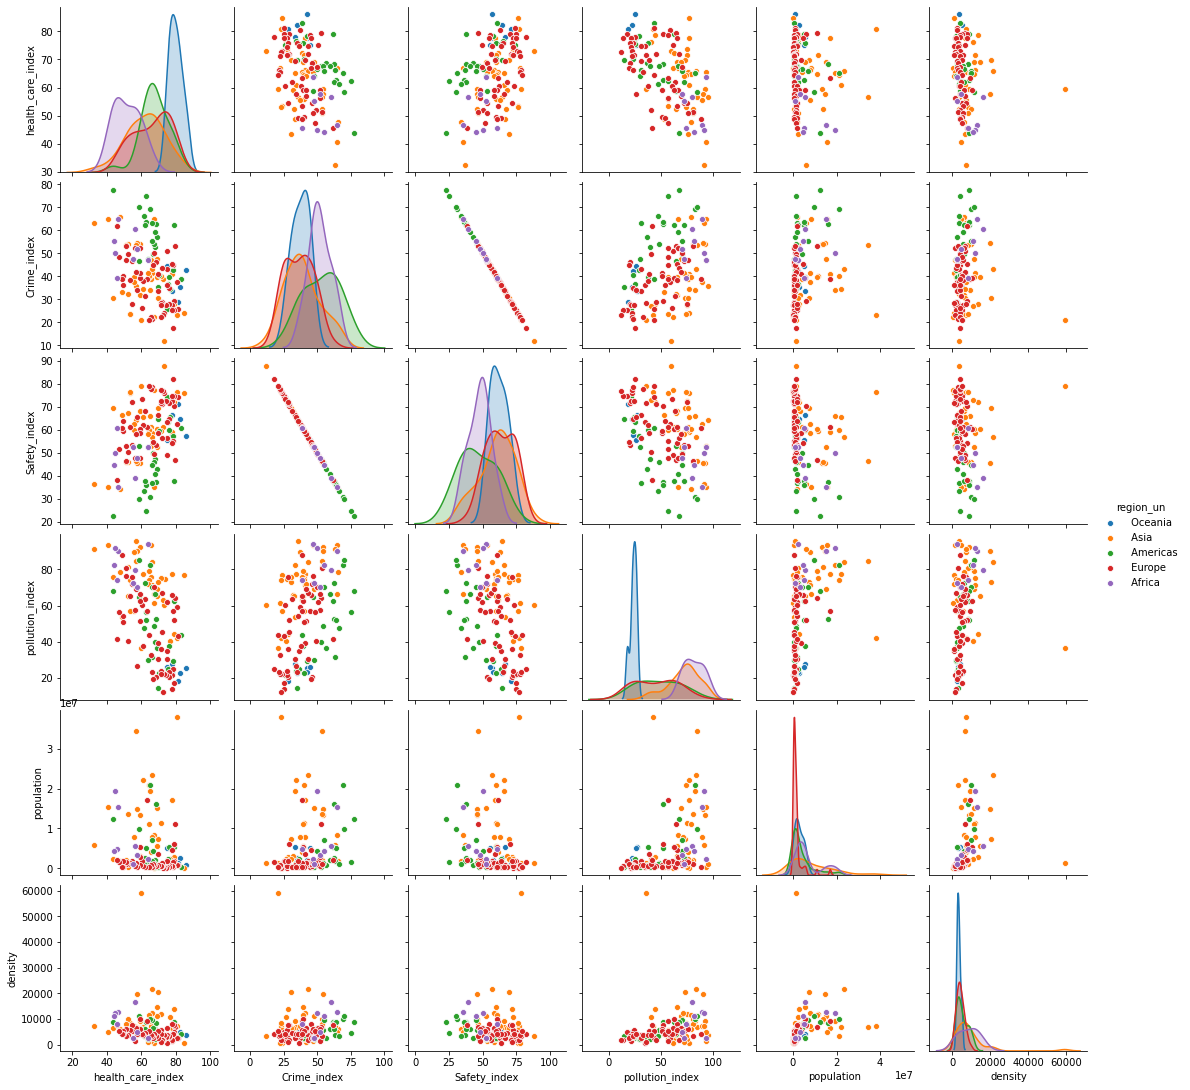

In [29]:
sns.pairplot(redfdf,hue='region_un', height=2.5)

In [32]:
redfdf.shape

(135, 11)

In [71]:
url4 = 'https://www.numbeo.com/quality-of-life/rankings.jsp?title=2021'
tables=pd.read_html('https://www.numbeo.com/quality-of-life/rankings.jsp?title=2021')
page4 = urllib.request.urlopen(url4)
soup4 = BeautifulSoup(page4, "lxml")

all_tables=soup.find_all("table", id="td")

right_table=soup4.find_all("table")
actual_table=soup4.find_all("tbody")
actual_table[0]

table=soup4.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

values=table.findAll('td')

Rank=[]
City=[]
qol = []
ppi = []
safety = []
health = []
col = []
prop_inc_rat = []
traffic = []
pollution =[]
climate =[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==11:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        qol.append(cells[2].find(text=True))
        ppi.append(cells[3].find(text=True))
        safety.append(cells[4].find(text=True))
        health.append(cells[5].find(text=True))
        col.append(cells[6].find(text=True))
        prop_inc_rat.append(cells[7].find(text=True))
        traffic.append(cells[8].find(text=True))
        pollution.append(cells[9].find(text=True))
        climate.append(cells[10].find(text=True))
        


df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['qol']= qol
df['ppi'] = ppi
df['safety'] = safety
df['health'] = health
df['col'] = col
df['prop_inc_rat']= prop_inc_rat
df['traffic'] = traffic
df['pollution'] = pollution
df['climate'] = climate

df['Rank'] = df.index + 1
df[['City1', 'Country']] = df['City'].astype('str').str.split(',', 1, expand=True)
df[['State', 'country']] = df['Country'].astype('str').str.split(',', 1, expand=True)
df.country = df.country.fillna(df.State)
df.country = df.country.astype('str').str.replace(' ', '')
df.country = df.country.astype('str').str.lower()

numbeo = df
#This is only for 2021. All analysis will be on 2021.
#numbeo.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\Python\numbeodf.csv')

In [72]:
#Set numerical columns to floats.
for i in ['qol','ppi','safety','health','col','prop_inc_rat','traffic','pollution','climate']:
    numbeo[i] = numbeo[i].astype('float')

In [79]:
fwiid['country'] = fwiid['country_name'] #New column to merge with numbeo.

In [80]:
#First alter the country column in fwiid before joining with numbeo. 
fwiid.country = fwiid.country.astype('str').str.replace(' ','')
fwiid.country = fwiid.country.astype('str').str.lower()
fdf = numbeo.join(fwiid.set_index('country'),on='country',rsuffix='_wiid',how='inner')

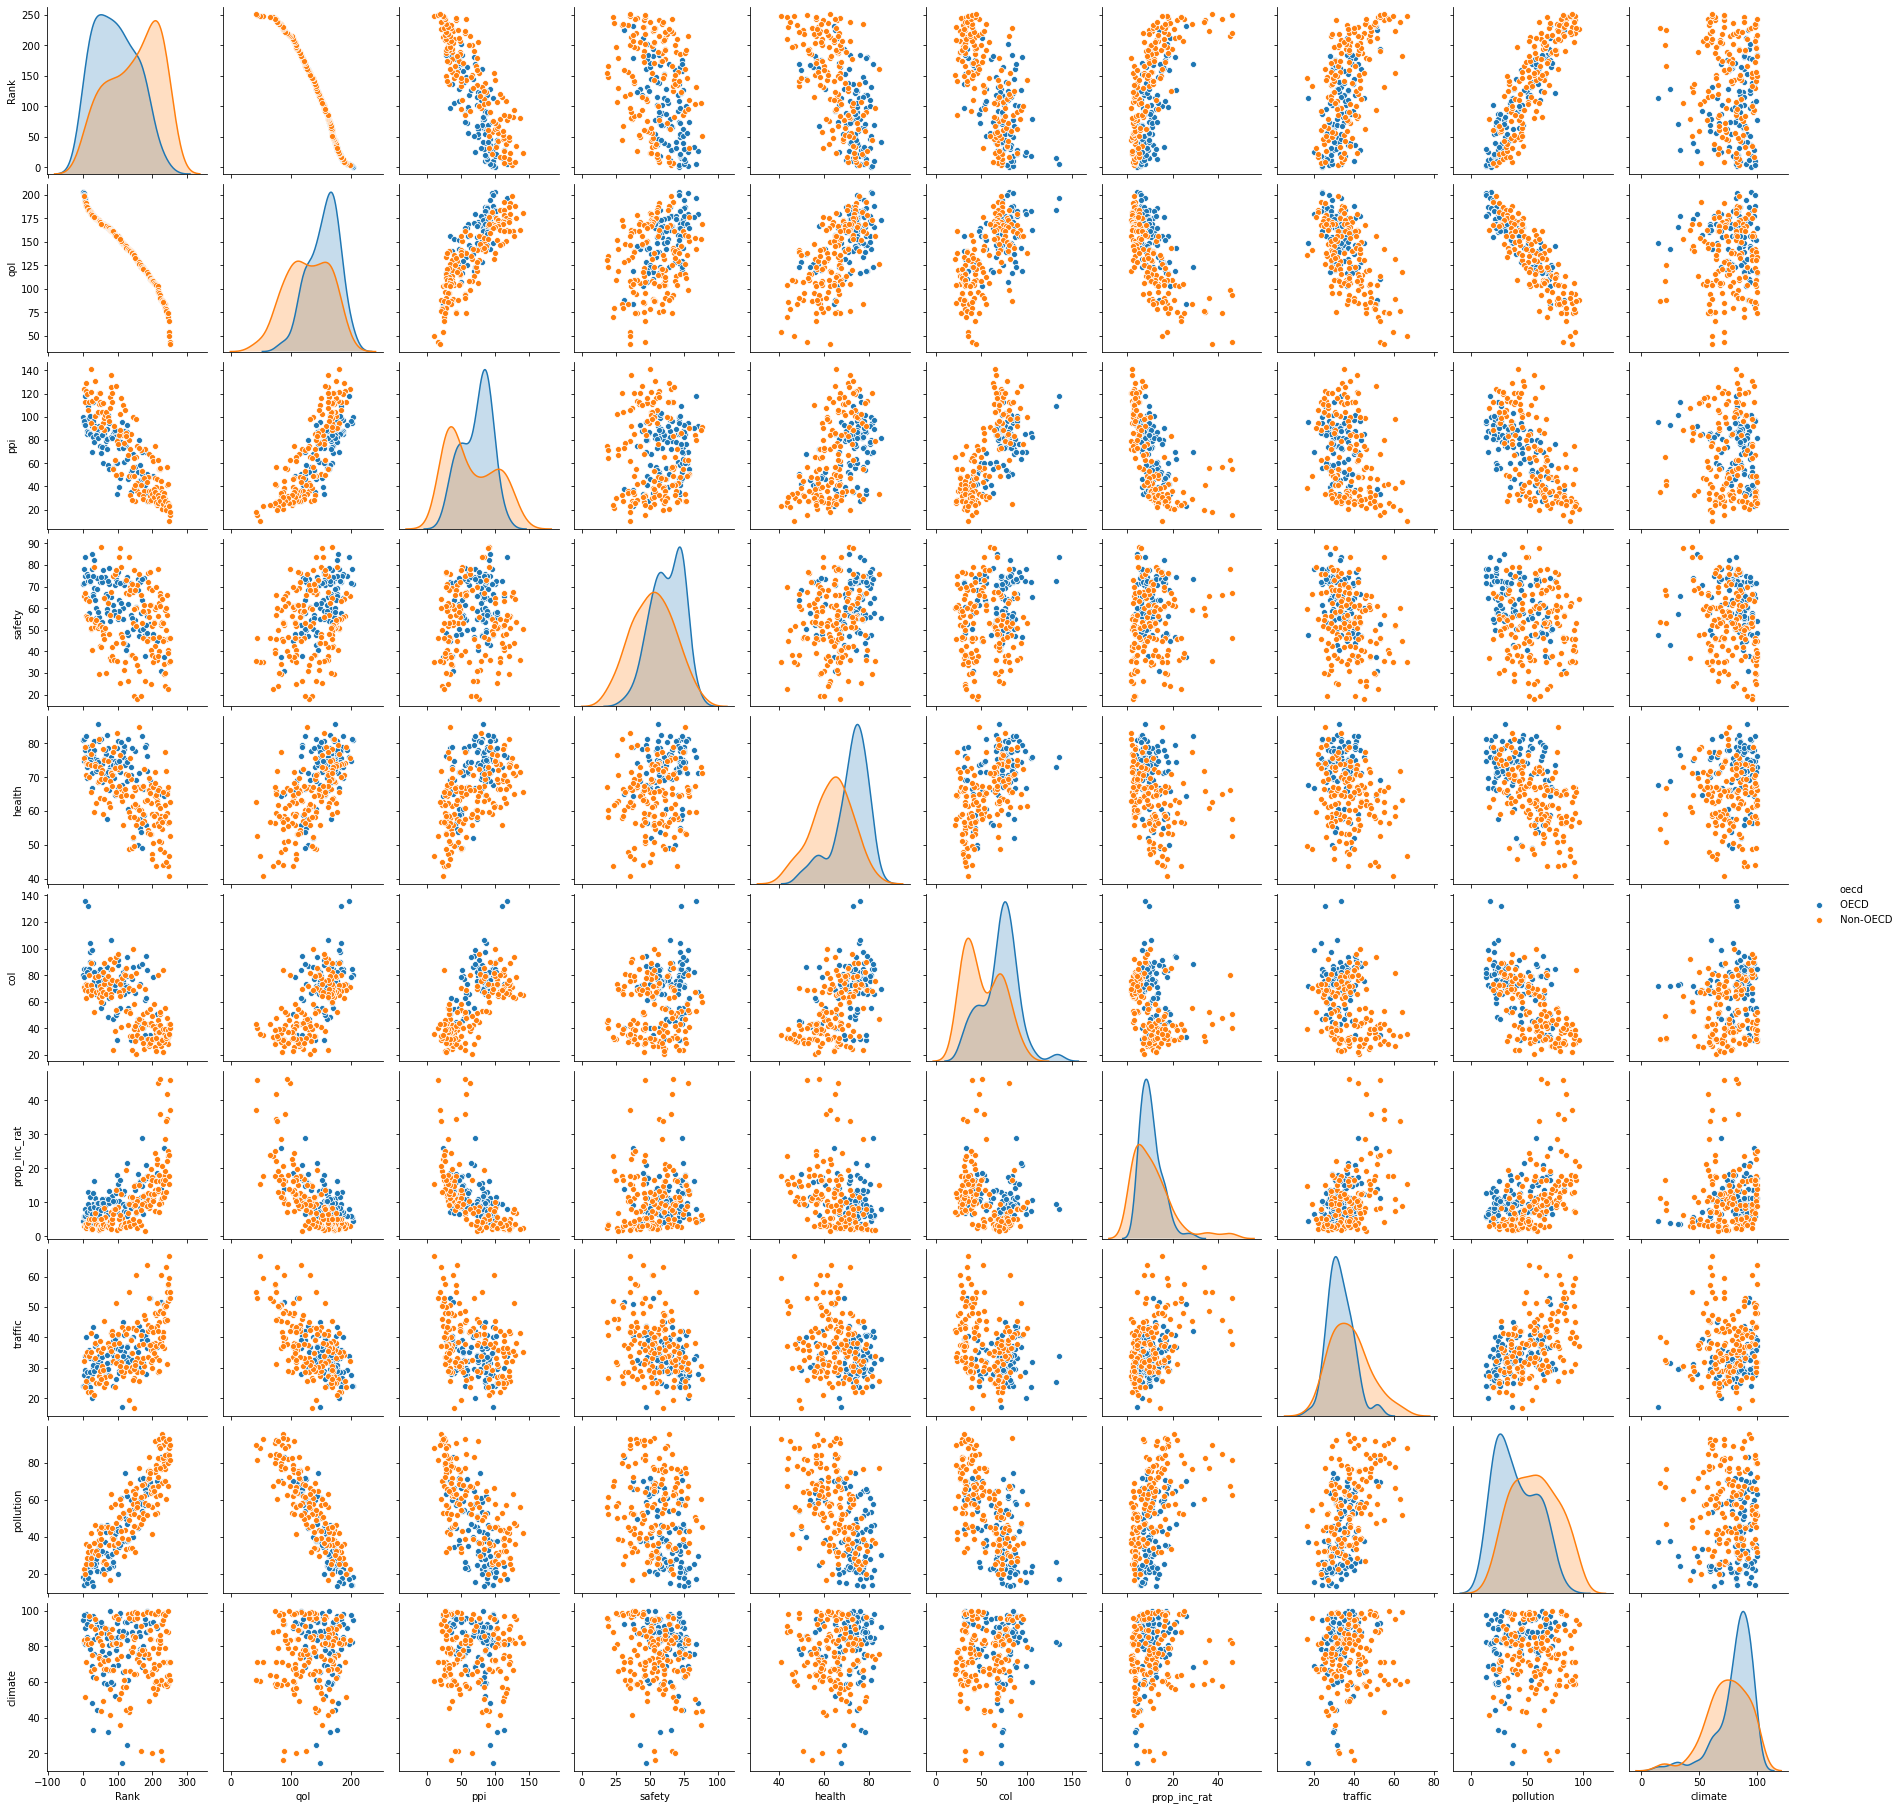

In [81]:
sns.pairplot(data = fdf,hue='oecd')